<a href="https://colab.research.google.com/github/KrisMatrix/TensorFlow_Certification_Prep/blob/main/03_introduction_to_computer_vision_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to CNN and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorihtms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we are working with are from the Food101 dataset (11 different classes of food): https://www.kallgle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb 

**Note:** We start with a smaller dataset so that we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
#@title
#We are going to be using the Food 101 dataset from Kaggle.

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-08 16:31:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   293MB/s    in 0.4s    

2021-08-08 16:31:53 (293 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any ML project is becoming one with the data.

And for a CV project...this usually means visualzing many samples of your data.

In [2]:
#@title
!ls pizza_steak

test  train


In [3]:
#@title
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
#@title
import os
#Walkthrough pizza_steak directory and list no. of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 1 images in pizza_steak.
There are 2 directories and 1 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 1 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


The dataset that the instructor is using was created on the MAC, and Apple products are stupid, so they create this .DS_Store file that you see below. This shows up a 1 image in pizza_steak, pizza_steak/train, pizza_steak/test directory.

In [5]:
#@title
!ls -lat pizza_steak/

total 24
drwxr-xr-x 4 root root 4096 Aug  8 16:31 test
drwxr-xr-x 4 root root 4096 Aug  8 16:31 train
drwxr-xr-x 4 root root 4096 Aug  8 16:31 .
-rw-r--r-- 1 root root 6148 Aug  8 16:31 .DS_Store
drwxr-xr-x 1 root root 4096 Aug  8 16:31 ..


In [6]:
#@title
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [7]:
#@title
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Create a list of class_names from the sub-directories
class_names = class_names[1:] #remove .DS_Store
print(class_names)

['pizza' 'steak']


In [8]:
#@title
#Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Set up target directory (we'll vew images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")  #show the shape of the image.
  return img

['2807888.jpg']
Image shape: (512, 512, 3)


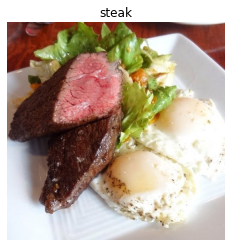

In [9]:
#@title
#View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
#@title
# Change image to tensor
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[114,  51,  42],
        [111,  48,  39],
        [109,  46,  37],
        ...,
        [244, 226, 222],
        [242, 224, 220],
        [242, 223, 219]],

       [[117,  54,  47],
        [115,  52,  45],
        [111,  48,  41],
        ...,
        [233, 210, 204],
        [227, 204, 198],
        [222, 199, 193]],

       [[119,  59,  51],
        [117,  57,  49],
        [113,  53,  45],
        ...,
        [180, 150, 140],
        [170, 137, 128],
        [160, 127, 118]],

       ...,

       [[232, 241, 250],
        [232, 241, 250],
        [233, 242, 251],
        ...,
        [195, 184, 182],
        [195, 184, 182],
        [195, 184, 182]],

       [[232, 241, 250],
        [232, 241, 250],
        [232, 241, 250],
        ...,
        [195, 184, 182],
        [195, 184, 182],
        [195, 184, 182]],

       [[231, 240, 249],
        [231, 240, 249],
        [231, 240, 249],
        ...,
        [195, 184, 18

In [11]:
#@title
# View the image shape
img.shape #returns width, height, colour channels

(512, 512, 3)

In [12]:
#@title
#Get all the pixel values b/w 0 & 1
img/255

array([[[0.44705882, 0.2       , 0.16470588],
        [0.43529412, 0.18823529, 0.15294118],
        [0.42745098, 0.18039216, 0.14509804],
        ...,
        [0.95686275, 0.88627451, 0.87058824],
        [0.94901961, 0.87843137, 0.8627451 ],
        [0.94901961, 0.8745098 , 0.85882353]],

       [[0.45882353, 0.21176471, 0.18431373],
        [0.45098039, 0.20392157, 0.17647059],
        [0.43529412, 0.18823529, 0.16078431],
        ...,
        [0.91372549, 0.82352941, 0.8       ],
        [0.89019608, 0.8       , 0.77647059],
        [0.87058824, 0.78039216, 0.75686275]],

       [[0.46666667, 0.23137255, 0.2       ],
        [0.45882353, 0.22352941, 0.19215686],
        [0.44313725, 0.20784314, 0.17647059],
        ...,
        [0.70588235, 0.58823529, 0.54901961],
        [0.66666667, 0.5372549 , 0.50196078],
        [0.62745098, 0.49803922, 0.4627451 ]],

       ...,

       [[0.90980392, 0.94509804, 0.98039216],
        [0.90980392, 0.94509804, 0.98039216],
        [0.91372549, 0

## An end-to-end example

Let's build a CNN to find patters in our images, more specifically, we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns ino ur images
* COmpile a CNN
* Fit the CNN to our training data

In [13]:
#@title
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values b/w 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories

#I have no idea why they thought it was necessary to content in one but not
# the other.

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                       batch_size=32,     #standard batch_size used in CNN's
                                       target_size=(224,224), #(height, width) to which images should be resized to.
                                       class_mode="binary", #determines the type of label arrays that are returned
                                       seed=42)            #random seed for shuffling and transformations.

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN Model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),    
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                  
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
#@title
len(train_data)

47

In [15]:
#@title
1500/32 #the length of 47 comes from dividing 1500 images with 32 batches.

46.875

In [16]:
#@title
#This is when I run without GPU
#history_1 = model_1.fit(train_data,
#                        epochs=5,
#                        steps_per_epoch=len(train_data),
#                        validation_data=valid_data,
#                        validation_steps=len(valid_data))

In [17]:
#@title
#With GPU
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 41s 209ms/step - loss: 0.5449 - accuracy: 0.7220 - val_loss: 0.4872 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4329 - accuracy: 0.7987 - val_loss: 0.3574 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3884 - accuracy: 0.8333 - val_loss: 0.3246 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3601 - accuracy: 0.8460 - val_loss: 0.3172 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3362 - accuracy: 0.8560 - val_loss: 0.3405 - val_accuracy: 0.8580


**Note**: GPUs are much much faster than regular CPUs. If your fit is taking too long, then switch to GPU by Edit->Notebook Settings -> Choose GPU.

# Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

🔑 Note: If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the TensorFlow Playground environment.

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.
The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [18]:
#@title
#KKK: Basically, we are going to use a basic NN classification and apply it to
# our images. We will see that the performance and accuracy is terrible.

# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 0.9066 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
#@title
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [20]:
#@title
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 3.6052 - accuracy: 0.6027 - val_loss: 1.2177 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6942 - accuracy: 0.7160 - val_loss: 0.4772 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.5491 - accuracy: 0.7573 - val_loss: 0.4902 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5161 - accuracy: 0.7740 - val_loss: 0.5842 - val_accuracy: 0.6920
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6367 - accuracy: 0.7313 - val_loss: 0.7062 - val_accuracy: 0.6800


In [21]:
#@title
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our mode, the main steps here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaludate the model
6. Adjust different parameters and improve our model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2538000.jpg']
Image shape: (512, 512, 3)
['518527.jpg']
Image shape: (512, 512, 3)


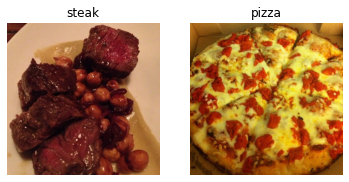

In [22]:
#@title
#Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for the model)

In [23]:
#@title
#Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather tha look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).

2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

32 is a good batch size for CNNs.

In [24]:
#@title
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
#@title
# Load in our image data from directories and turn them into batches.

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
#@title
# Get a sample of a training data batch.
images, labels = train_data.next()  #get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
#@title
# How many batches are there?
len(train_data)

47

In [28]:
#@title
1500/32

46.875

In [29]:
#@title
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
#@title
images[7].shape

(224, 224, 3)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [31]:
#@title
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
#@title
# Create the model (this will be our baseline, a layer )

model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10,3, activation="relu"),
  Conv2D(10,3, activation="relu"),
  Flatten(),
  Dense(1,activation="sigmoid") # output layer for Binary classification                     
])

In [33]:
#@title
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
#@title
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the Model

In [35]:
#@title
# Check the lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
#@title
# Fit the model
history_4 = model_4.fit(train_data, 
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 1.8287 - accuracy: 0.5687 - val_loss: 0.5447 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4829 - accuracy: 0.7800 - val_loss: 0.4234 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4032 - accuracy: 0.8313 - val_loss: 0.3762 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3563 - accuracy: 0.8487 - val_loss: 0.3445 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3006 - accuracy: 0.8893 - val_loss: 0.3422 - val_accuracy: 0.8480


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

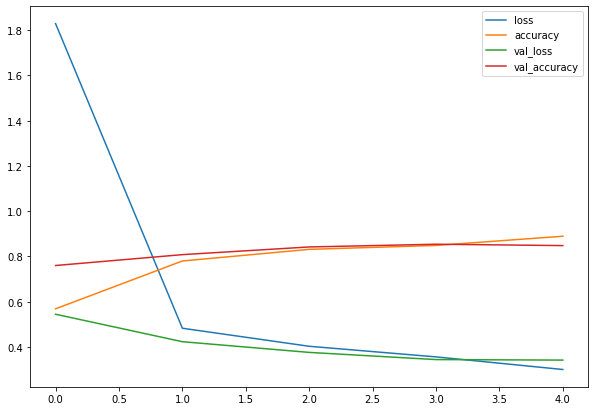

In [37]:
#@title
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [38]:
#@title
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  
  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()  #will cause a second plot to be created
  plt.plot(epochs, accuracy, label="training_loss")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

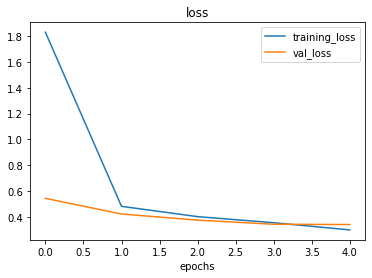

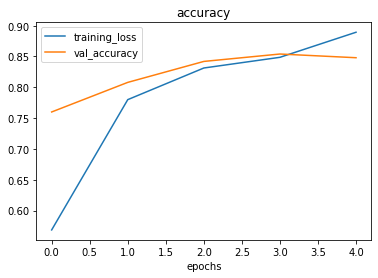

In [39]:
#@title
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** When a model's validation loss starts to *increase*, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

fitting a ML model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also called **regularization**.

In [40]:
#@title
# Create the model (this is going to be our new baseline)

model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10,3, activation="relu"),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [41]:
#@title
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
#@title
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.5814 - accuracy: 0.7060 - val_loss: 0.5524 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4705 - accuracy: 0.7807 - val_loss: 0.3988 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4341 - accuracy: 0.8087 - val_loss: 0.4523 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4053 - accuracy: 0.8240 - val_loss: 0.3519 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3685 - accuracy: 0.8387 - val_loss: 0.3196 - val_accuracy: 0.8660


In [43]:
#@title
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [44]:
#@title
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

We observe that the no of params in model_5 is much lower, however, we observer that the loss is decreasing. This is because of MaxPool.

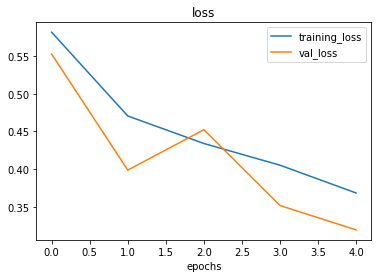

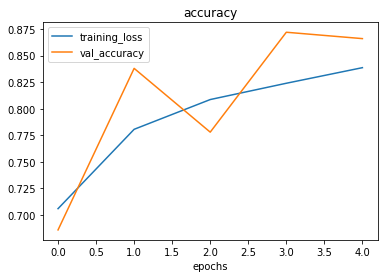

In [45]:
#@title
plot_loss_curves(history_5)

### Opening our bag or tricks and finding data augmentation

In [46]:
#@title
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augmentation?

Data augmentation is the process of altering out training data, leading it to have more diversity and in turn allowing our models to leran more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something else.

Let's write some code to visualize the data augmentation...

In [47]:
#@title
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)  #for demonstration purposes only

# Create non-augmenteted train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [48]:
#@title
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

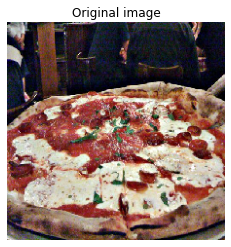

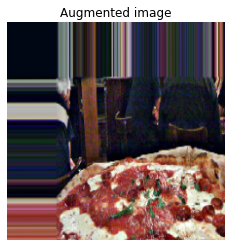

In [49]:
#@title
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

### What is data augmentation?

Looking at the same image but from different perspectives. For example, by flipping, rotating, shifting, zooming, cropping, shearing, replacing, etc.

Now that we've see what augmented training data looks like, let's build a model and see how it learns

In [50]:
#@title
# Create a model (same as )
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 467ms/step - loss: 0.7291 - accuracy: 0.4473 - val_loss: 0.6872 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.7020 - accuracy: 0.4760 - val_loss: 0.6833 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 23s 489ms/step - loss: 0.7510 - accuracy: 0.5720 - val_loss: 0.6950 - val_accuracy: 0.4700
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6937 - accuracy: 0.4727 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6925 - accuracy: 0.4893 - val_loss: 0.6912 - val_accuracy: 0.5000


Data augmentation will cause the fit() to run slower. This is because the augmentation is happenning on the fly and may be running on th CPU. Therefore, it will be slower.

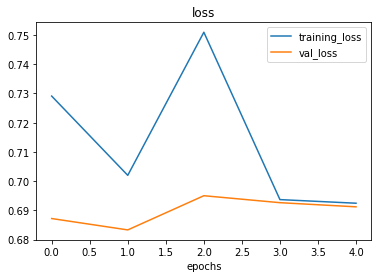

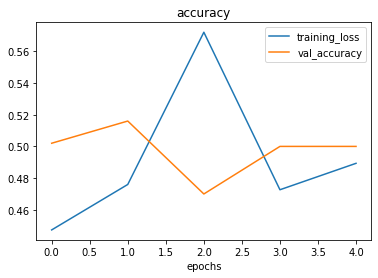

In [51]:
#@title
# Check our models training curves 
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [52]:
#@title
# Import data and augment it and shuffl from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=True)  #Observe shuffle changed to True)

Found 1500 images belonging to 2 classes.


In [53]:
#@title
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 499ms/step - loss: 0.6585 - accuracy: 0.5993 - val_loss: 0.6326 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6057 - accuracy: 0.6713 - val_loss: 0.5185 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6116 - accuracy: 0.6733 - val_loss: 0.5007 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5272 - accuracy: 0.7340 - val_loss: 0.3752 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 462ms/step - loss: 0.4872 - accuracy: 0.7753 - val_loss: 0.3379 - val_accuracy: 0.8600


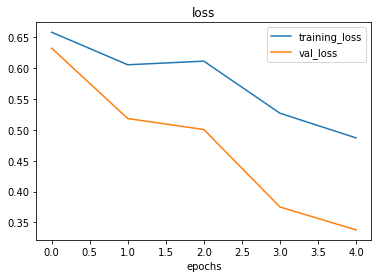

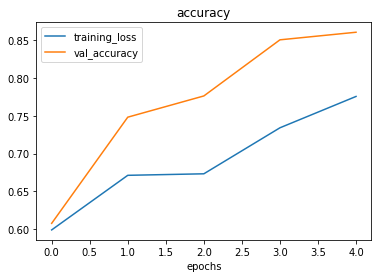

In [54]:
#@title
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kind of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue our model:

* Increase the no. of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)

* Increase the no. of filters in each convolutional layer (e.g. from 10 to 32 or even 64)

* Train for longer (more epochs)

* Find an ideal learning rate

* Get more data (give the model more opportunities to learn)

* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case.

In [55]:
#@title
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 479ms/step - loss: 0.6413 - accuracy: 0.6153 - val_loss: 0.4956 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 23s 497ms/step - loss: 0.5588 - accuracy: 0.7207 - val_loss: 0.4245 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 23s 493ms/step - loss: 0.5325 - accuracy: 0.7387 - val_loss: 0.4051 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 22s 480ms/step - loss: 0.5025 - accuracy: 0.7740 - val_loss: 0.3760 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5016 - accuracy: 0.7693 - val_loss: 0.3495 - val_accuracy: 0.8380


In [56]:
#@title
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [57]:
#@title
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

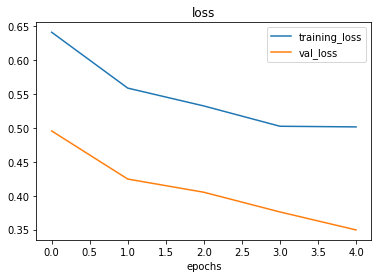

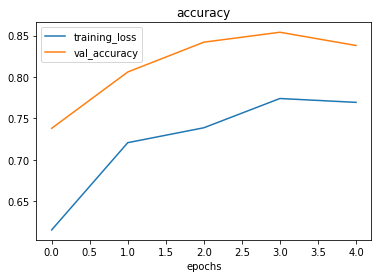

In [58]:
#@title
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

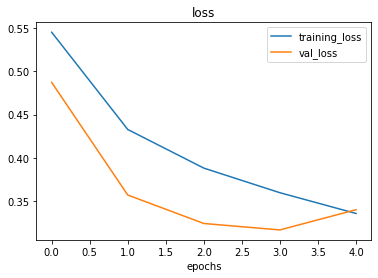

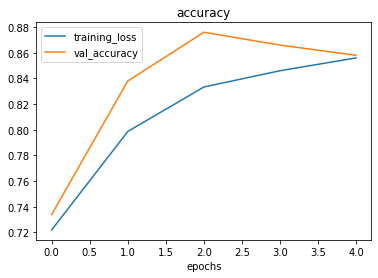

In [59]:
#@title
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

## Making a predicton with our trained model on our own custom data

In [60]:
#@title
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-08-08 16:42:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-08-08 16:42:26 (52.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



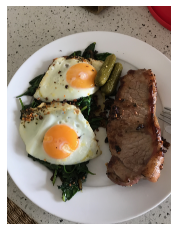

In [61]:
#@title
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [62]:
#@title
# Check the shape of our image
steak.shape

(4032, 3024, 3)

This is a really large image. 

**Note:** For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [63]:
#@title
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [64]:
#@title
# Load in and preprocess our 
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [65]:
#@title
expanded_steak = tf.expand_dims(steak, axis=0)

In [66]:
#@title
pred = model_8.predict(expanded_steak)
pred

array([[0.7922475]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability to visualize the image as well as the model's prediction?

In [67]:
#@title
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [68]:
#@title
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [69]:
#@title
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [70]:
#@title
model_7.predict(tf.expand_dims(steak, axis=0))

array([[0.89339685]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [71]:
#@title
class_names

array(['pizza', 'steak'], dtype='<U9')

In [72]:
#@title
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [73]:
#@title
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

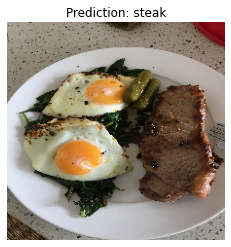

In [74]:
#@title
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works. Let's try it on another image...this time pizza.

--2021-08-08 16:42:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2021-08-08 16:42:29 (50.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



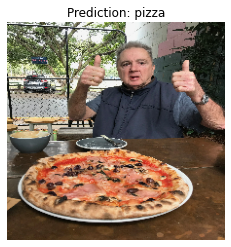

In [75]:
#@title
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step tings up a notch with 10 classes of food.

1. Import and become one with the data.
2. Preprocess the data (get it ready for a model).
3. Create a model (start with a baseline).
4. Fit the model (over fit it to make sure it works).
5. Evaludate the model.
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting).
7. Repeat unitl satisfied.


## 1. Import and become one with the data

In [77]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-08-08 16:48:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   254MB/s    in 1.9s    

2021-08-08 16:48:42 (254 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [79]:
import os 

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}''")

There are 2 directories and 0 images in '10_food_classes_all_data''
There are 10 directories and 0 images in '10_food_classes_all_data/train''
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen''
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza''
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings''
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi''
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry''
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice''
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak''
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger''
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon''
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream''

In the above database (from Kaggle Food 101 database which is also available on ZTM Tensorflow Github), the images have already been divided into training and test sets at 3:1 ratio

In [80]:
#Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [81]:
# Let's get the class names (i.e. label names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1558241.jpg']
Image shape: (512, 512, 3)


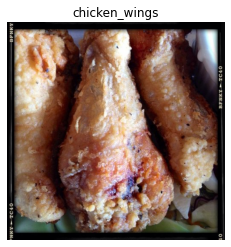

In [84]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

#We defined view_random_image() earlier in this file.

## 2. Preprocess the data (prepare it for a model)

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale 
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


#KK: Here we are 

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model(start with a baseline)
We've been talking a lot aout the CNN Explainer website...

How about we just take their model (also on 10 classes) and use it for our model.

The CNN explainer has 10 labels and the following model:

input->(conv->relu)->(conv->relu->maxpool)->(conv->relu)->(conv->relu->maxpool)->output

In [94]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#Why Flatten()?

#Create our model (very similar to prev models but actually the same as the CNN explainer model)
model_9 = Sequential([
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                                           
])

#We set filter size = 10, based on the CNN explainer. This may be because of 10
# labels.
#We setn Dense(10, activation="softmax"), because we have 10 labels to work
# with. We use softmax becaue we don't want a binary classification.
#We Flatten()

#Compile the model
model_9.compile(loss="categorical_crossentropy",  #Changed from binary to categorical for multiclass
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 3. Fit a model

In [95]:
# Fit the model
history_9 = model_9.fit(train_data, #now 10 diff classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 191ms/step - loss: 2.1617 - accuracy: 0.2121 - val_loss: 2.0129 - val_accuracy: 0.2808
Epoch 2/5
235/235 [==============================] - 45s 194ms/step - loss: 1.8575 - accuracy: 0.3575 - val_loss: 1.8729 - val_accuracy: 0.3456
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.4283 - accuracy: 0.5248 - val_loss: 2.0334 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 0.8154 - accuracy: 0.7400 - val_loss: 2.6070 - val_accuracy: 0.2900
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.3271 - accuracy: 0.9033 - val_loss: 3.6513 - val_accuracy: 0.2732


## 5. Evaluate the model

In [96]:
# Evaluate on the test data

model_9.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 3.6513 - accuracy: 0.2732


[3.6512651443481445, 0.27320000529289246]

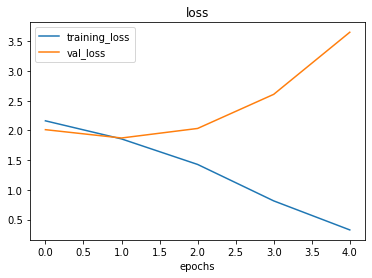

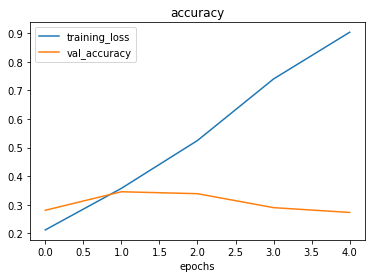

In [98]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these loss curves tell us?

Well.. it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well on unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...

* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce no. of layers or reduce no. of hidden units in layers.

* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)

* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [99]:
# How about we try and simplify our model first?

model_9.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 28090)           

In [100]:
# Let's try to remove 2 conv layers

#Create our model (very similar to prev models but actually the same as the CNN explainer model)
model_10 = Sequential([
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                                           
])

#We set filter size = 10, based on the CNN explainer. This may be because of 10
# labels.
#We setn Dense(10, activation="softmax"), because we have 10 labels to work
# with. We use softmax becaue we don't want a binary classification.
#We Flatten()

#Compile the model
model_10.compile(loss="categorical_crossentropy",  #Changed from binary to categorical for multiclass
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [104]:
model_10.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [105]:
model_9.summary() #Model_9 actually has fewer params. It is looking at more specific args that it is training on.

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 28090)           

In [101]:
# Fit the model with 2 conv2d layers removed
history_10 = model_10.fit(train_data, #now 10 diff classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 180ms/step - loss: 2.0804 - accuracy: 0.2613 - val_loss: 1.9035 - val_accuracy: 0.3276
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.7703 - accuracy: 0.3947 - val_loss: 1.8990 - val_accuracy: 0.3408
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.4609 - accuracy: 0.5105 - val_loss: 1.9082 - val_accuracy: 0.3476
Epoch 4/5
235/235 [==============================] - 43s 185ms/step - loss: 1.0918 - accuracy: 0.6501 - val_loss: 2.0701 - val_accuracy: 0.3384
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.6772 - accuracy: 0.7996 - val_loss: 2.3842 - val_accuracy: 0.3112


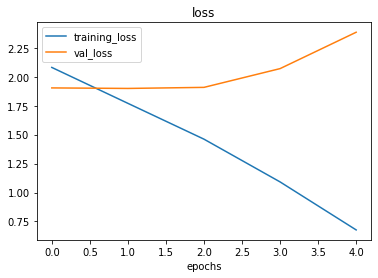

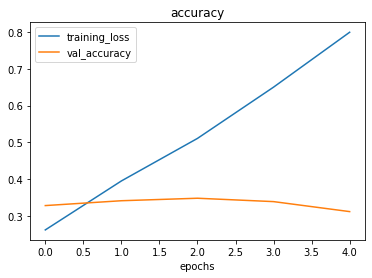

In [103]:
# Check out the loss_curves

plot_loss_curves(history_10)

Looks like our 'simplifying the model' experiment didn't work. The accuracy went down and overfitting continued...

How about we try data aug?

### Trying to reduce overfitting with data augmentation.

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [107]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [108]:
# Let's create another model but this time we'll fit it on the augmented training data 

model_11 = tf.keras.models.clone_model(model_9) #clones the architecture of model_9

# Compile the cloned model (using the same setup as prev models)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [110]:
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 480ms/step - loss: 2.2598 - accuracy: 0.1424 - val_loss: 2.0803 - val_accuracy: 0.2300
Epoch 2/5
235/235 [==============================] - 111s 473ms/step - loss: 2.1101 - accuracy: 0.2429 - val_loss: 1.9463 - val_accuracy: 0.3160
Epoch 3/5
235/235 [==============================] - 111s 474ms/step - loss: 2.0347 - accuracy: 0.2752 - val_loss: 1.8530 - val_accuracy: 0.3584
Epoch 4/5
235/235 [==============================] - 111s 471ms/step - loss: 1.9808 - accuracy: 0.3056 - val_loss: 1.8249 - val_accuracy: 0.3540
Epoch 5/5
235/235 [==============================] - 111s 474ms/step - loss: 1.9299 - accuracy: 0.3245 - val_loss: 1.7899 - val_accuracy: 0.3780


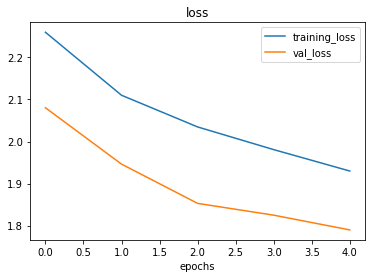

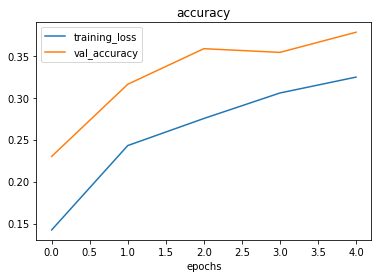

In [111]:
plot_loss_curves(history_11)

In [113]:
model_11.evaluate(test_data)

79/79 [==============================] - 11s 144ms/step - loss: 1.7899 - accuracy: 0.3780


[1.7898597717285156, 0.3779999911785126]

We observe that now, the validation loss as well as training loss is decreasing.

## 7. Repeat until satisfied.

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring out model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- train for longer (e.g. 10 epochs of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [114]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [115]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2021-08-08 19:09:11--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1     [ <=>                ] 125.20K  --.-KB/s    in 0.02s   

2021-08-08 19:09:11 (5.23 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [128202]

--2021-08-08 19:09:11--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg       [ <=>                ] 125.06K  --.-KB/s    in 0.02s   

2021-08-08 19:09:12 (5.24 MB/s) - ‘03-hamburger.jpeg’ saved [12806

In [119]:
# We are going to change this function for multiclass
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add in logic for multi-class
  if len(pred[0] > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[tf.round(pred[0])]

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

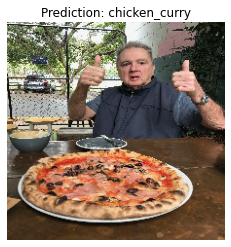

In [122]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
          filename="03-pizza-dad.jpeg",
          class_names=class_names)

# Saving and Loading our model

In [126]:
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [127]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.7899 - accuracy: 0.3780


[1.7898600101470947, 0.3779999911785126]

In [128]:
model_11.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.7899 - accuracy: 0.3780


[1.789859414100647, 0.3779999911785126]